In [2]:
import pandas as pd


players = pd.read_csv('football_players.csv', encoding='latin1')


most_common_overall = players['Overall'].mode()[0]

print(f"The most common Overall score for players in the database is: {most_common_overall}")


The most common Overall score for players in the database is: 66.0


/tmp/ipykernel_162236/3992760034.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_defenders['Class'] = central_defenders['Overall'].apply(classify_player)


Confusion Matrix:
 [[574  14   0]
 [ 20 277   2]
 [  0   5  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       588
           1       0.94      0.93      0.93       299
           2       0.89      0.76      0.82        21

    accuracy                           0.95       908
   macro avg       0.93      0.89      0.91       908
weighted avg       0.95      0.95      0.95       908

Top 5 features:
              Feature  Importance
31   Standing tackle    0.171992
22           Marking    0.131898
18     Interceptions    0.123995
28    Sliding tackle    0.096025
17  Heading accuracy    0.072676


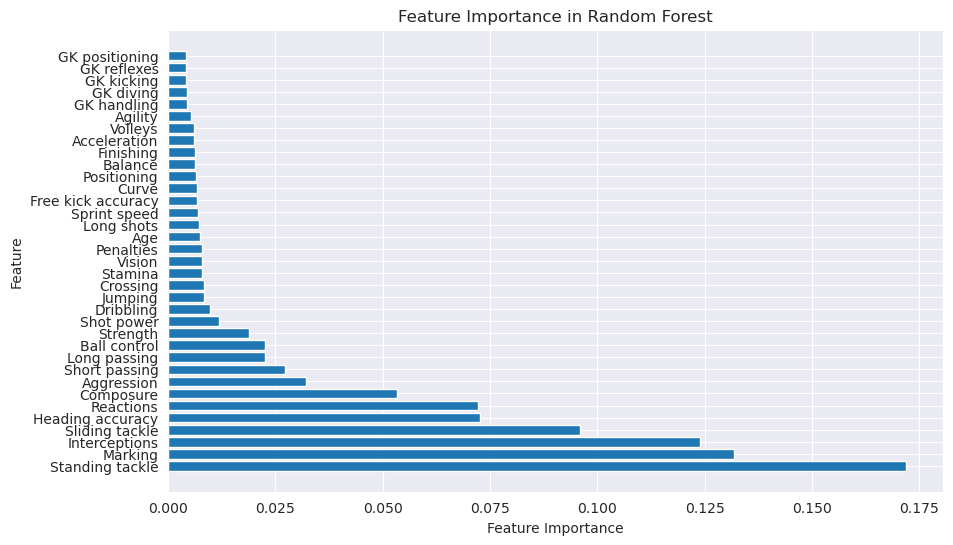

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


players = pd.read_csv('football_players.csv', encoding='latin1')


central_defenders = players[players['Preferred Positions'].str.contains('CB', na=False)]


def classify_player(overall):
    if overall >= 80:
        return 'World Class'
    elif 70 <= overall < 80:
        return 'Good'
    else:
        return 'Mediocre'

central_defenders['Class'] = central_defenders['Overall'].apply(classify_player)


X = central_defenders.select_dtypes(include=['int64', 'float64']).drop(columns=['Overall'])
y = central_defenders['Class']


y = y.map({'World Class': 2, 'Good': 1, 'Mediocre': 0})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1971)


rf_classifier = RandomForestClassifier(n_estimators=500, random_state=1971)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


print("\nClassification Report:\n", classification_report(y_test, y_pred))


feature_importances = rf_classifier.feature_importances_
features = X.columns


importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


print("Top 5 features:\n", importance_df.head(5))


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


players = pd.read_csv('football_players.csv', encoding='latin1')


central_defenders = players[players['Preferred Positions'].str.contains('CB', na=False)]


def classify_player(overall):
    if overall >= 80:
        return 'World Class'
    elif 70 <= overall < 80:
        return 'Good'
    else:
        return 'Mediocre'

central_defenders['Class'] = central_defenders['Overall'].apply(classify_player)


X = central_defenders.select_dtypes(include=['int64', 'float64']).drop(columns=['Overall'])
y = central_defenders['Class']


y = y.map({'World Class': 2, 'Good': 1, 'Mediocre': 0})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=911)


best_f1_world_class = 0
best_f1_good = 0
best_k_world_class = 0
best_k_good = 0


for k in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    f1_world_class = f1_score(y_test, y_pred, average=None)[2]  
    f1_good = f1_score(y_test, y_pred, average=None)[1] 

    if f1_world_class > best_f1_world_class:
        best_f1_world_class = f1_world_class
        best_k_world_class = k
    if f1_good > best_f1_good:
        best_f1_good = f1_good
        best_k_good = k

print(f"Best k for World Class: {best_k_world_class}, F1 Score: {best_f1_world_class}")
print(f"Best k for Good: {best_k_good}, F1 Score: {best_f1_good}")


/tmp/ipykernel_162236/2555637845.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_defenders['Class'] = central_defenders['Overall'].apply(classify_player)


Best k for World Class: 5, F1 Score: 0.6428571428571429
Best k for Good: 5, F1 Score: 0.8005780346820809
